In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

C:\Users\TAMILKUMARAN\AppData\Local\Temp\ipykernel_16568\3517738790.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_path = "train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

C:\Users\TAMILKUMARAN\AppData\Local\Temp\ipykernel_16568\4071926184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')


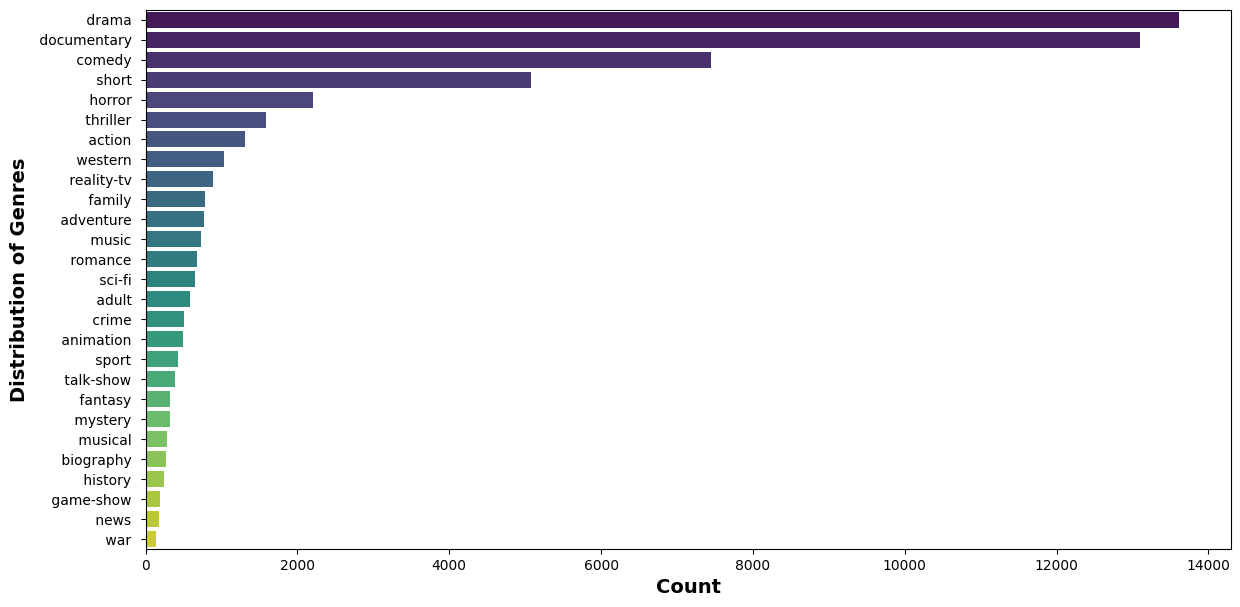

In [3]:
# Plot distribution of genres
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Distribution of Genres', fontsize=14, fontweight='bold')
plt.show()

In [4]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

In [5]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove @mentions
    text = re.sub(r'@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove pic URLs
    text = re.sub(r'pic.\S+', '', text)
    # Keep only alphabets and specific characters
    text = re.sub(r"[^a-zA-Z\s']", ' ', text)
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize words
    words = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join(word for word in words if word not in stop_words and len(word) > 2)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [6]:
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)

In [7]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

In [8]:

# Split data into train and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred_NB = clf_NB.predict(X_val)
accuracy_NB = accuracy_score(y_val, y_pred_NB)
print("Naive Bayes Classifier Accuracy:", accuracy_NB)
print(classification_report(y_val, y_pred_NB))


Naive Bayes Classifier Accuracy: 0.4463709305542746
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.08      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery

c:\Users\TAMILKUMARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TAMILKUMARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TAMILKUMARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [11]:
clf_logreg = LogisticRegression(multi_class='multinomial', solver='sag')
clf_logreg.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial', solver='sag')

In [12]:
# Evaluate Logistic Regression classifier
y_pred_LR = clf_logreg.predict(X_val)
accuracy_LR = accuracy_score(y_val, y_pred_LR)
print("Logistic Regression Classifier Accuracy:", accuracy_LR)
print(classification_report(y_val, y_pred_LR))

Logistic Regression Classifier Accuracy: 0.5789910541363091


c:\Users\TAMILKUMARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.59      0.21      0.31       263
       adult        0.87      0.18      0.30       112
   adventure        0.48      0.09      0.16       139
   animation        1.00      0.02      0.04       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.55      1443
       crime        1.00      0.01      0.02       107
 documentary        0.65      0.87      0.74      2659
       drama        0.53      0.81      0.64      2697
      family        0.50      0.05      0.10       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.92      0.30      0.45        40
     history        0.00      0.00      0.00        45
      horror        0.67      0.55      0.60       431
       music        0.70      0.36      0.48       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

c:\Users\TAMILKUMARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TAMILKUMARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:

# Plotting the comparison of accuracies
total_accuracy = accuracy_NB + accuracy_LR
portion1 = accuracy_NB / total_accuracy
portion2 = accuracy_LR / total_accuracy


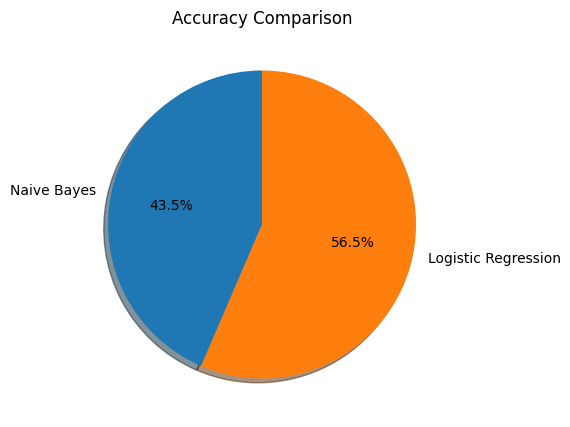

In [14]:
labels = ['Naive Bayes', 'Logistic Regression']
sizes = [portion1, portion2]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Accuracy Comparison')
plt.show()